In [1]:
import pandas as pd
data=pd.read_csv('Iris.csv')

In [2]:
data=data.drop("PetalLengthCm",1)
data=data.drop("PetalWidthCm",1)

In [3]:
data=data[:100]

In [4]:
data.iloc[85]

Id                            86
SepalLengthCm                  6
SepalWidthCm                 3.4
Species          Iris-versicolor
Name: 85, dtype: object

In [5]:
from sklearn import preprocessing

In [6]:
data2=preprocessing.scale(data[['SepalLengthCm','SepalWidthCm']])

In [7]:
import numpy as np 
species=np.zeros(100)
for i in range(100):
    if i>50:
        species[i]=1

In [8]:
species=species.astype('int32')

In [9]:
data22=pd.DataFrame(data2,columns=["SepalLengthCm","SepalWidthCm"])

In [10]:
data22['Species']=species

In [11]:
from sklearn.preprocessing import normalize
data3 = normalize(data2, axis=1, norm='l2')

In [12]:
data33=pd.DataFrame(data3,columns=["SepalLengthCm","SepalWidthCm"])

In [13]:
data33.iloc[85]

SepalLengthCm    0.788610
SepalWidthCm     0.614894
Name: 85, dtype: float64

In [14]:
data33['Species']=species

In [15]:
x=data3[:,0]
y=data3[:,1]

In [16]:
angles=np.array(2*np.arctan2(y,x))

In [17]:
angles[7]

4.844693632588688

In [18]:
dataframe_anges=pd.DataFrame(angles)

In [19]:
from collections import OrderedDict

In [20]:
def circuit(angles1):
    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
    qbits=QuantumRegister(6)
    cbits=ClassicalRegister(6)
    qc=QuantumCircuit(qbits,cbits)
    qc.h(qbits[0])
    qc.h(qbits[1])
    qc.h(qbits[2])
    qc.barrier()
    qc.cry(angles1,qbits[2],qbits[3])
    qc.x(qbits[2])
    qc.barrier()
    qc.mcry(angles[62], [qbits[0],qbits[1],qbits[2]], qbits[3], q_ancillae=[qbits[5]], mode='basic', use_basis_gates=False)
    qc.barrier()
    qc.cx(qbits[1],qbits[0])   
    qc.x(qbits[1])
    qc.barrier()
    qc.mcry(angles[58], [qbits[0],qbits[1],qbits[2]], qbits[3], q_ancillae=[qbits[5]], mode='basic', use_basis_gates=False)
    qc.barrier()
    qc.cx(qbits[1],qbits[0])
    qc.x(qbits[1])
    qc.barrier()
    qc.mcry(angles[42], [qbits[0],qbits[1],qbits[2]], qbits[3], q_ancillae=[qbits[5]], mode='basic', use_basis_gates=False)
    qc.barrier()
    qc.cx(qbits[1],qbits[0])
    qc.x(qbits[1])
    qc.barrier()
    qc.mcry(angles[7], [qbits[0],qbits[1],qbits[2]], qbits[3], q_ancillae=[qbits[5]], mode='basic', use_basis_gates=False)
    qc.barrier()
    qc.cx(qbits[1],qbits[0])
    qc.x(qbits[1])
    qc.barrier()
    qc.ccx(qbits[0],qbits[1],qbits[4])
    qc.cx(qbits[1],qbits[0])
    qc.x(qbits[1])
    qc.ccx(qbits[0],qbits[1],qbits[4])
    qc.barrier()
    qc.h(qbits[2])
    qc.barrier()
    qc.measure(qbits[0],cbits[0])
    qc.measure(qbits[1],cbits[1])
    qc.measure(qbits[2],cbits[2])
    qc.measure(qbits[3],cbits[3])
    qc.measure(qbits[4],cbits[4])
    shots = 4000
    qmlResult = execute(qc, backend = BasicAer.get_backend('qasm_simulator'), shots = shots)
    qmlCounts = qmlResult.result().get_counts(qc)
    for _ in qmlCounts:
       qmlCounts[_] = qmlCounts[_] / shots
    qmlProbabilities = OrderedDict(sorted(qmlCounts.items()))
    return qmlProbabilities 


In [21]:
circuit(angles[85])

OrderedDict([('0000001', 0.00225),
             ('0000010', 0.00025),
             ('0000101', 0.206),
             ('0000110', 0.1605),
             ('0001001', 0.033),
             ('0001010', 0.09775),
             ('0001101', 0.015),
             ('0010000', 0.092),
             ('0010011', 0.18575),
             ('0010100', 0.0105),
             ('0010111', 0.00175),
             ('0011000', 0.00475),
             ('0011011', 0.01025),
             ('0011100', 0.13125),
             ('0011111', 0.049)])

In [22]:
lst=[]
for i in range(0,100):
    lst.append(circuit(angles[i]))

In [23]:
df = pd.DataFrame(lst) 


In [24]:
df.fillna(0,inplace=True)

In [25]:
df=df.T

In [26]:
x=df.index

In [27]:
df.drop([x[2],x[3],x[6],x[7],x[10],x[13],x[14],x[15]],inplace=True)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0000001,0.15650,0.23250,0.23525,0.25075,0.15775,0.06550,0.21175,0.19275,0.24800,0.24200,...,0.04900,0.00000,0.01675,0.11500,0.03125,0.00125,0.00700,0.00000,0.12500,0.01625
0000010,0.11800,0.19550,0.19675,0.18000,0.10775,0.04300,0.17350,0.14025,0.17950,0.20400,...,0.03425,0.00325,0.00650,0.08400,0.01375,0.00100,0.00050,0.00250,0.08800,0.00325
0001001,0.06450,0.00075,0.00750,0.00200,0.05225,0.08575,0.02000,0.03950,0.00050,0.00100,...,0.04625,0.00000,0.02950,0.03900,0.04775,0.00950,0.02750,0.00175,0.03425,0.03425
0001010,0.13200,0.01425,0.04175,0.02850,0.13075,0.16950,0.07675,0.10750,0.01150,0.02725,...,0.00600,0.01375,0.00350,0.00300,0.00675,0.00175,0.00050,0.00625,0.00300,0.00175
0010000,0.00175,0.02050,0.02125,0.02450,0.00175,0.00850,0.01850,0.00850,0.02250,0.02200,...,0.00875,0.12450,0.05275,0.00000,0.02400,0.10600,0.07100,0.10400,0.00000,0.05125
0010011,0.01050,0.00000,0.00000,0.00000,0.01225,0.05125,0.00025,0.00350,0.00000,0.00025,...,0.05925,0.24050,0.12400,0.01925,0.09125,0.21450,0.17025,0.24375,0.01975,0.13325
0010111,0.14300,0.23425,0.23500,0.24875,0.15425,0.06925,0.21625,0.17750,0.22525,0.24525,...,0.05400,0.00000,0.01425,0.11325,0.03625,0.00000,0.00475,0.00000,0.12375,0.01600
0011000,0.00050,0.08450,0.03900,0.05125,0.00075,0.00050,0.01400,0.00375,0.08775,0.05125,...,0.23875,0.07375,0.20650,0.21400,0.22400,0.12625,0.18075,0.09575,0.20825,0.19750


In [29]:
df.iloc[0][1]

0.2325

In [30]:
len(df)

8

In [31]:
p=[]
for i in range(100):
    d=sum(df.iloc[0:4][i])/sum(df.iloc[:][i])
    p.append(d)
             
    

In [32]:
df3=pd.DataFrame(p,columns=["results"])

In [33]:
df3.iloc[0]

results    0.751496
Name: 0, dtype: float64

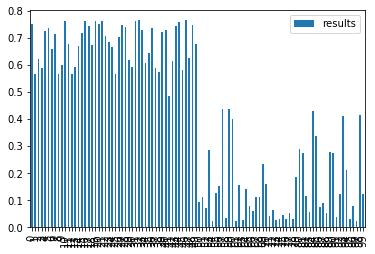

In [34]:
df3.plot(kind='bar')

In [35]:
df3.loc[df3.results >= 0.5, 'class'] = -1
df3.loc[df3.results < 0.5, 'class'] = 1

In [36]:
df3

,results,class
0,0.751496,-1.0
1,0.566315,-1.0
2,0.619768,-1.0
3,0.587019,-1.0
4,0.726316,-1.0
...,...,...
95,0.029332,1.0
96,0.076798,1.0
97,0.023128,1.0
98,0.415698,1.0


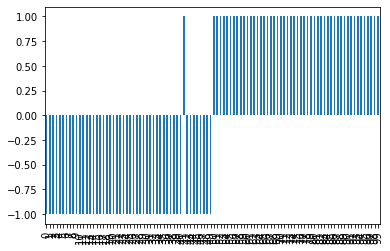

In [37]:
df3['class'].plot(kind='bar')